<a href="https://colab.research.google.com/github/badriguddu/almabetter_projects/blob/main/Badri_Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised ML - Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member 1 -** Badrinath Mohanty
##### **Cohort** - Bali


# **Project Summary -**

The objective of this project is to analyze and cluster a dataset related to Netflix. **The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters.**

To begin with, the dataset will be preprocessed by handling missing values, removing irrelevant columns, and transforming categorical variables into numerical representations. Feature engineering techniques may also be applied to extract useful information from the existing attributes.

Next, exploratory data analysis (EDA) techniques will be utilized to gain insights into the dataset. Visualizations and statistical summaries will be used to understand the **distribution of variables, identify any trends, and explore relationships between different features.**

Once the dataset has been thoroughly analyzed, clustering algorithms such as k-means, hierarchical clustering, or density-based spatial clustering will be employed. These algorithms will group similar Netflix shows and movies together based on their attributes. **The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.**

After the **clustering process**, the results will be evaluated and interpreted. The clusters will be analyzed to understand the common characteristics and patterns within each group. **This analysis will provide valuable information for Netflix in terms of content categorization, recommendation systems, and content acquisition strategies.**

Finally, the findings and insights from the clustering analysis will be summarized and presented in a clear and concise manner. Visualizations, charts, and graphs will be used to effectively communicate the outcomes of the project. **Recommendations may also be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix to enhance user experience and content offerings.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

This dataset consists of TV shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


### Import Libraries

In [1]:
# Import Libraries

# library used for Analyzing and Visualization purpose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
netflix= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
# netflix

### Dataset First View

In [4]:
# Dataset First Look
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [5]:
# First 5 rows from the Netflix Dataset

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Last 10 rows from the Netflix Dataset

netflix.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

print('The Dataset contains total number of', netflix.shape[0],'rows and', netflix.shape[1],'columns')

The Dataset contains total number of 7787 rows and 12 columns


### Dataset Information

In [8]:
# Dataset Info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

netflix.duplicated()
netflix.duplicated().sum()

print('So, the dataset contain', netflix.duplicated().sum(),'number of duplicated values')

So, the dataset contain 0 number of duplicated values


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count

print(netflix.isna().sum())
print('\n\nTotal number of missing values in the dataset are', netflix.isna().sum().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


Total number of missing values in the dataset are 3631


In [11]:
# Missing Values Percentage
round(netflix.isna().sum()/len(netflix)*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

<Axes: >

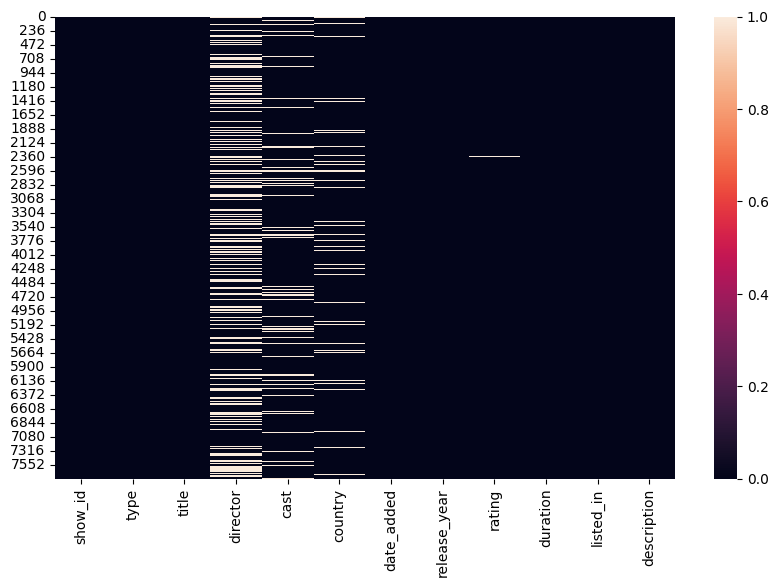

In [12]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(netflix.isnull())

In [13]:
netflix['country'].mode()

0    United States
Name: country, dtype: object

In [14]:
# Handling missing values

#Filling the missing values of Country column by its most appearing rows
netflix['country'].fillna(value=netflix['country'].mode()[0],inplace=True)

# Filling the missing values of cast column with 'No Cast'
netflix['cast'].fillna(value='No Cast',inplace=True)

# Filling out the missing values of Director column with 'Unknown'
netflix['director'].fillna(value='Unknown', inplace=True)

In [15]:
# Deleting/Droping the 10 rows of 'date_added' column
# netflix.dropna()

### What did you know about your dataset?

This dataset contains information about several TV series and movies available on Netflix, including production country, release year, rating, runtime, genre, and descriptions. It contains 12 columns and 7787 rows.

The dataset, obtained from Flixable, a third-party Netflix search engine, represents Netflix's TV series and movies as of 2019. A 2018 survey finds a stunning growth in TV episodes, which has tripled since 2010, while movie titles have declined by nearly 2,000.

Further investigation promises exciting findings. Integration with external datasets such as IMDB ratings and Rotten Tomatoes may reveal new insights.

Netflix's huge catalog has over 7,500 episodes, including 2,500 original shows.

Netflix Originals, a popular genre, has seen significant development.

The platform expands by adding more international shows, emphasizing high-quality content with top-rated shows that appeal to a wide range of interests and age groups.

The quantity of Netflix episodes and Originals is continually growing, with an increase in international shows.

Netflix's shows maintain a high average rating, a long runtime, and availability in multiple countries.







## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns

list(netflix.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [17]:
# Dataset Describe
netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,7787,7787,7787,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4050,6832,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,Unknown,No Cast,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2389,718,3062,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

## Attribute Information

1) ***show_id*** : Unique ID for every Movie / Tv Show

2) ***type*** : Identifier - A Movie or TV Show

3) ***title*** : Title of the Movie / Tv Show

4) ***director*** : Director of the Movie

5) ***cast*** : Actors involved in the movie / show

6) ***country*** : Country where the movie / show was produced

7) ***date_added*** : Date it was added on Netflix

8) ***release_year*** : Actual Releaseyear of the movie / show

9) ***rating*** : TV Rating of the movie / show

10) ***duration*** : Total Duration - in minutes or number of seasons

11) ***listed_in*** : Genere

12) ***description*** : The Summary description

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.

netflix.nunique()

for column in netflix.columns:
  print('Number of unique values in', column, 'column are', netflix[column].nunique())

Number of unique values in show_id column are 7787
Number of unique values in type column are 2
Number of unique values in title column are 7787
Number of unique values in director column are 4050
Number of unique values in cast column are 6832
Number of unique values in country column are 681
Number of unique values in date_added column are 1565
Number of unique values in release_year column are 73
Number of unique values in rating column are 14
Number of unique values in duration column are 216
Number of unique values in listed_in column are 492
Number of unique values in description column are 7769


In [19]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.

# Converting the datatype of 'date_added' column to date_time format
netflix['date_added']= pd.to_datetime(netflix['date_added'])

# Creating new feature to store Date, Month and Year separately
netflix['Day'] = netflix['date_added'].dt.day

netflix['Month'] = netflix['date_added'].dt.month

netflix['Year'] = netflix['date_added'].dt.year

In [21]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,1.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,19.0,10.0,2020.0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",25.0,9.0,2020.0
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,31.0,10.0,2020.0


### What all manipulations have you done and insights you found?


1. **Director:**
   - Missing values are present in the "Director" column. Fill those missing values with 'Unknown'.

2. **Country:**
   - Missing values exist in the "Country" column, and these have been filled with mode value of the country column means most occuring value present in that column.

3. **Cast:**
   - The "Cast" column contains missing values, which have been filled with the placeholder "No cast."

4. **Date:**
   - Missing values are observed in the "Date Added" column.

5. **Unique Values:**
   - Each column has different unique values.

6. **Date Added Column:**
   - In the "Date Added" column, additional information has been extracted, including the day, month, and year.

In summary, the dataset requires attention to handle missing values in the director, country, cast, and date added columns. The filling strategy involves using "No cast" for cast and mode value of country column for country. The date added column has been enhanced by extracting additional information. Each column exhibits distinct unique values. After analysing dataset we are more focusing toward 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description' columns and these column carry a lots of information.

*We are building our model on the top of mentioned features where those feature are used to create one cluster column to implement K-means, Hierarchical clustering and building content based recommandation system as well.*

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Find which content(movie or TV shows) is most watched on Netflix?

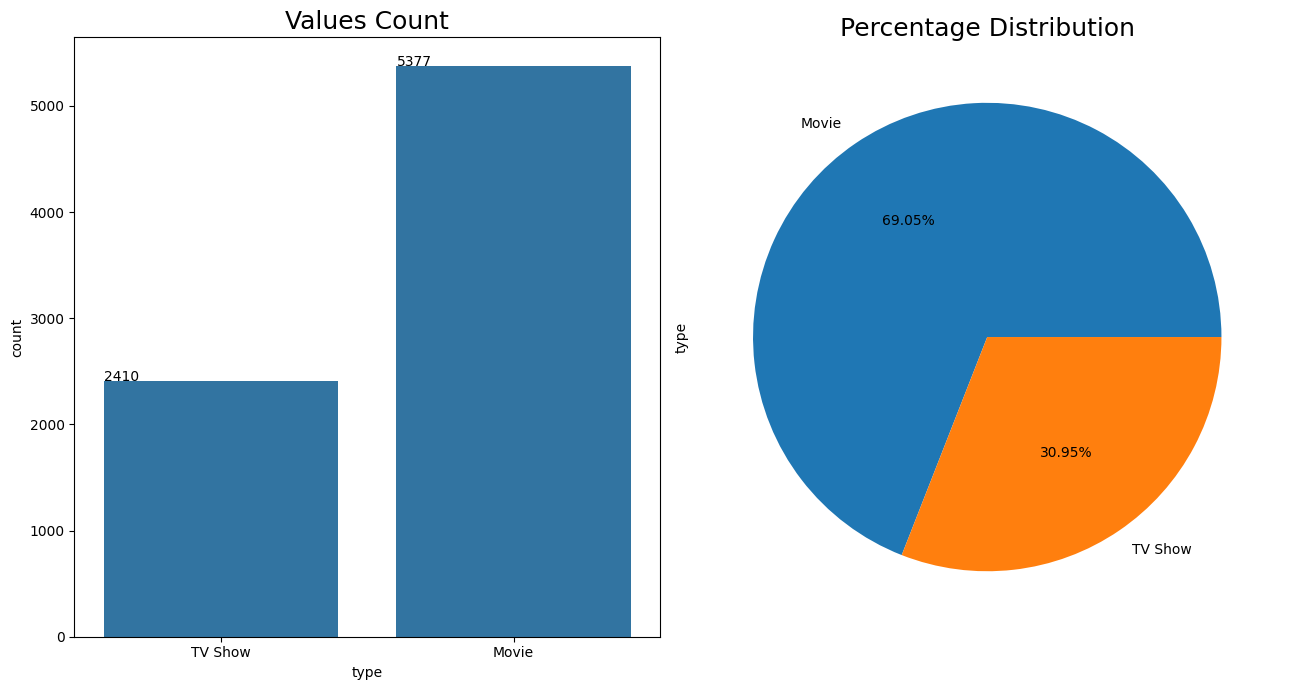

In [22]:
# Chart - 1 visualization code

netflix['type'].nunique()

fig,ax = plt.subplots(1,2, figsize=(13,7))

# coutplot
graph = sns.countplot(x=netflix['type'], ax=ax[0])
graph.set_title('Values Count', size=18)
# adding value count on the top of bar
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# piechart
netflix['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1])
plt.title('Percentage Distribution', size=18)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The use of a pie chart in the code is appropriate for illustrating the distribution of categorical data, specifically the types of material (TV shows and movies) watched on Netflix. A pie chart is an excellent way to show the proportion of each category compared to the entire dataset. This representation enables readers to immediately understand the percentage distribution and make comparisons between the two content kinds.

By selecting a pie chart, the code provides a clear and succinct representation of the relative proportions of the "TV Show" and "Movie" categories, making it easier to understand Netflix's content distribution.

##### 2. What is/are the insight(s) found from the chart?

The majority of content watched on Netflix is movies (69.1%), with TV shows accounting for a lower share (30.95%)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The findings demonstrate a strong preference for movies over TV shows, with a much greater percentage of 69.1% against 30.9% for TV series. This demonstrates that individuals prefer shorter formats, such as TV series, rather than longer, potentially less engaging movies.


#### Netflix Ratings

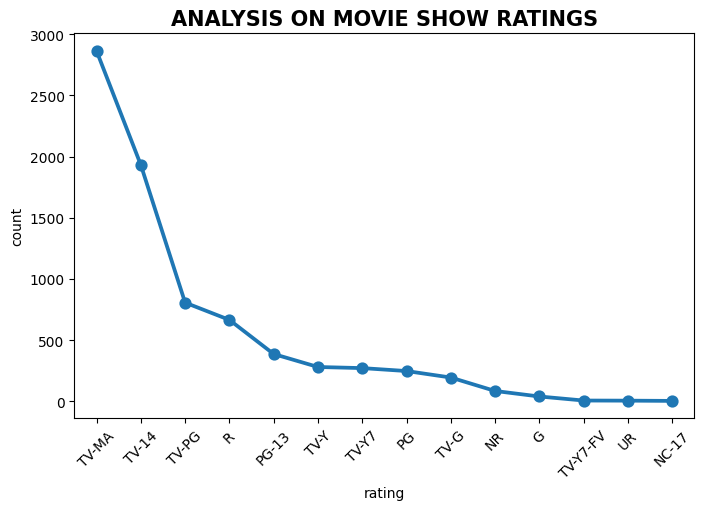

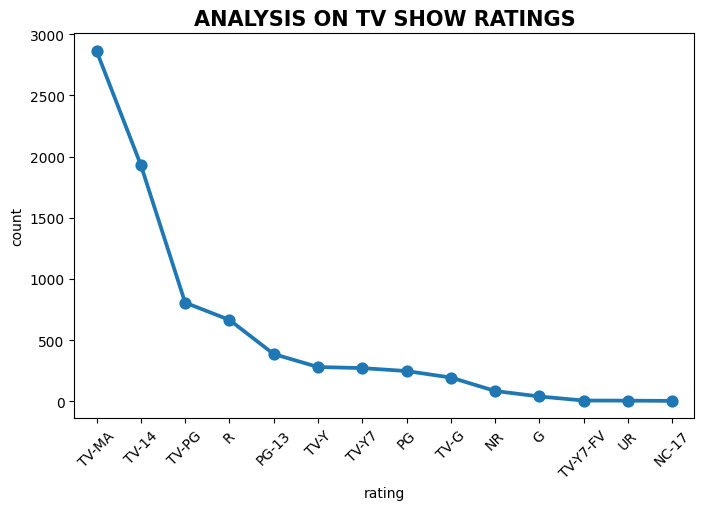

In [23]:
# Chart - 2 visualization code

#Analysis on rating based on overall movie show rating system
movies_ratings = netflix.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movies_ratings)
plt.title('ANALYSIS ON MOVIE SHOW RATINGS', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)

#Analysis rating based on overall tv show rating system
tv_ratings = netflix.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('ANALYSIS ON TV SHOW RATINGS', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

The most common rating for movies and television show is TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience." Since the number of movies is higher than the number of TV shows, as we saw earlier in the type column, movies receive the highest rating when compared to TV shows, which is pretty obvious.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above observation it is clear that 'TV-F7-FV', 'UR'and 'NC-17' need to improve their strategy so that people will like their content

#### Netflix Release Month

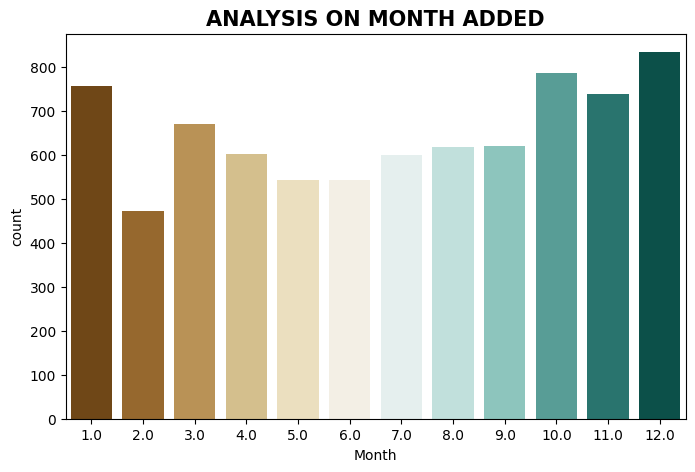

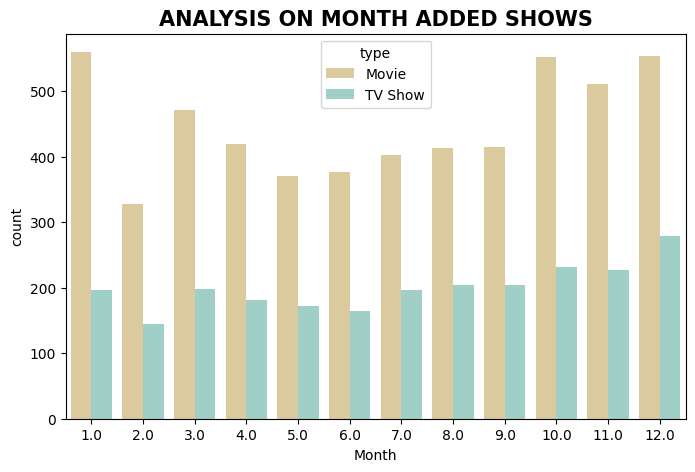

In [24]:
# Chart - 3 visualization code

#Analysis on content added monthly
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='Month', palette="BrBG", data=netflix, ax=ax)
plt.title('ANALYSIS ON MONTH ADDED', fontsize=15, fontweight='bold')
# plt.show()

#Analysis on contnet(movies/tv shows) added monthly
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='Month', hue='type',palette="BrBG", data=netflix, ax=ax)
plt.title('ANALYSIS ON MONTH ADDED SHOWS', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

The Count plot is useful for comparing and displaying categorical data (months) and their associated counts. The graphic aids in understanding the distribution of content additions across months and spotting patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

The quantity of TV series and movies launched on the Netflix site increases significantly between October and December.The months of October to December are recognized for having many holidays and events, such as Halloween, Diwali, Thanksgiving, and Christmas, which frequently result in individuals spending more time at home and seeking entertainment options

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gathered on the increase in TV episodes and movies on the Netflix platform between October and December have the potential to have a favorable business impact. Here are some reasons:

1) Meeting seasonal demand.

2) Retaining existing subscribers

3) Attracting new subscribers.

#### Netflix Genres

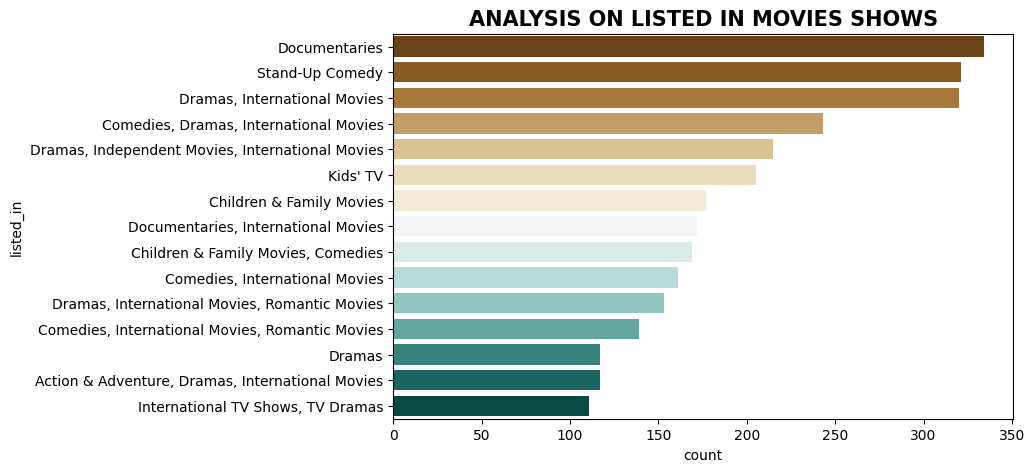

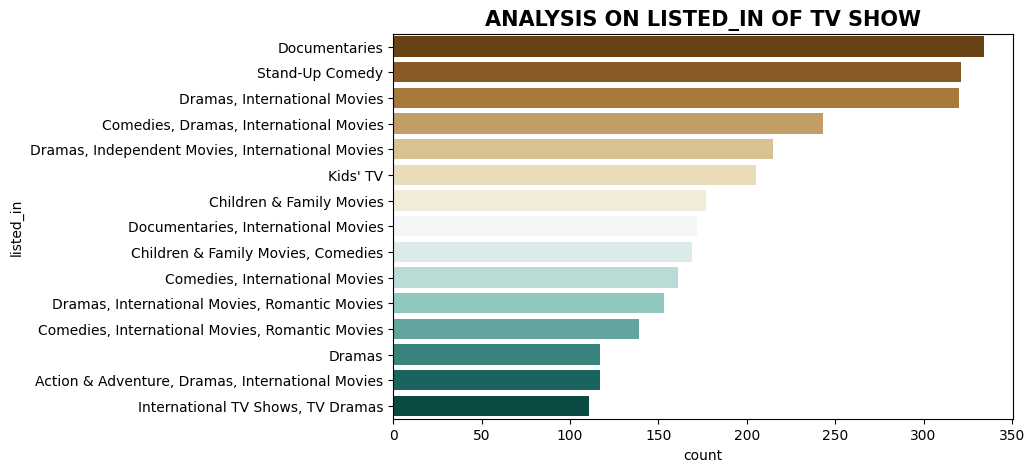

In [25]:
# Chart - 4 visualization code

#Analysis listed in movie shows
plt.figure(figsize=(8,5))
sns.countplot(y="listed_in", data=netflix, palette="BrBG", order=netflix['listed_in'].value_counts().index[0:15])
plt.title('ANALYSIS ON LISTED IN MOVIES SHOWS', fontsize=15, fontweight='bold')

#Analysis on listed in tv shows
plt.figure(figsize=(8,5))
sns.countplot(y="listed_in", data=netflix, palette="BrBG", order=netflix['listed_in'].value_counts().index[0:15])
plt.title('ANALYSIS ON LISTED_IN OF TV SHOW', fontsize=15,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because it depicts the top genres on Netflix. This graphic is essential for analysis since it can help us understand Netflix members' genre preferences.


##### 2. What is/are the insight(s) found from the chart?

* Drama is the most popular genre on Netflix, accounting for 20.1% of the market share, indicating a strong interest among consumers in drama material.
* Comedy is the second most popular genre on Netflix, accounting for 18.7% of the market share. * This implies that Netflix customers are interested in comedy content.
* Netflix's third most popular genre is action, accounting for 12.8% of the market share. * This shows that Netflix consumers are interested in action-oriented material.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this chart can help Netflix make a good business impact by understanding its users' interests. Netflix, for example, might prioritize adding more drama, comedy, and action content, which are the most popular genres. Netflix can also focus on adding more material in popular user genres such as documentaries, crime, and horror films.


#### Distribution of TV shows duration

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

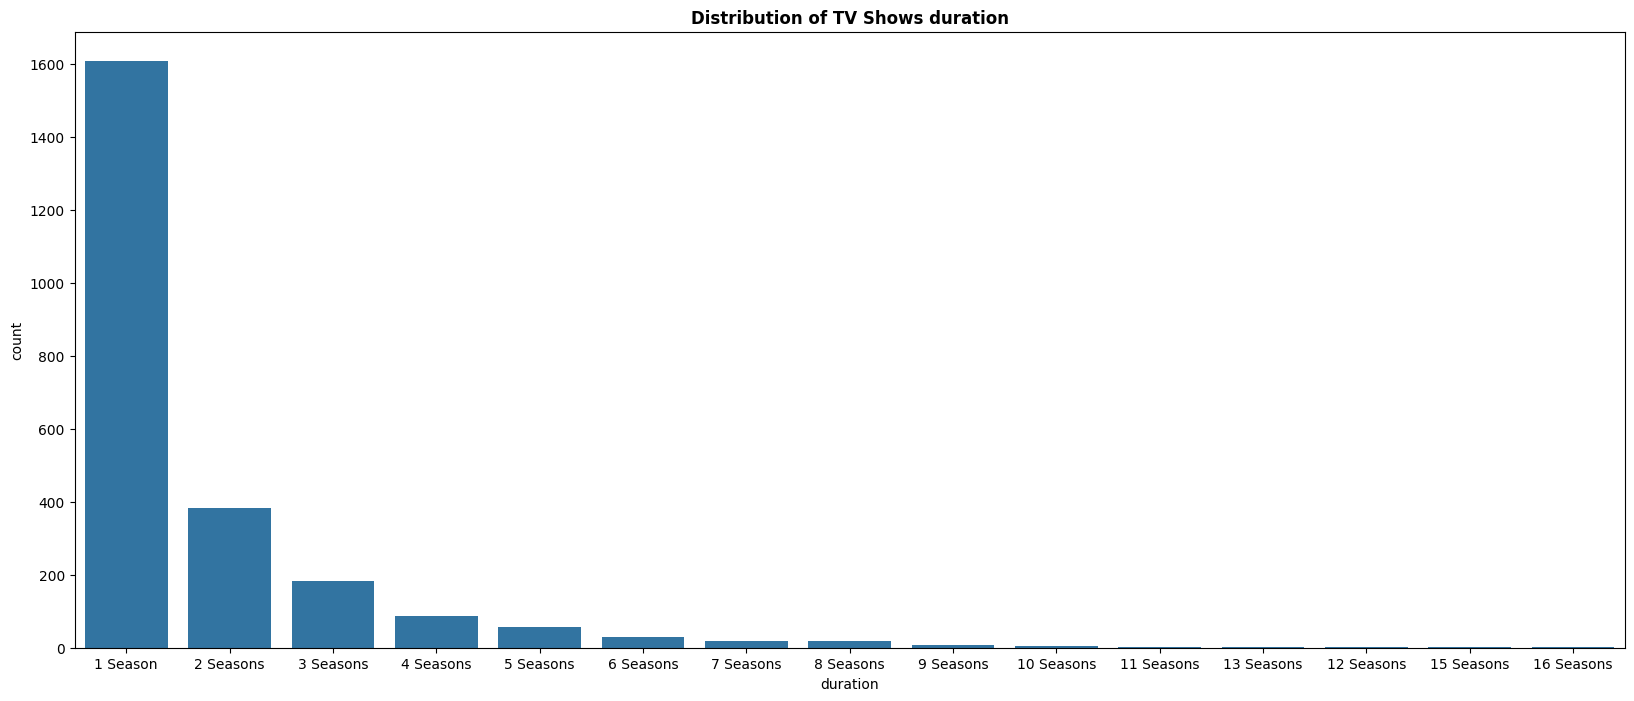

In [26]:
# Chart - 5 visualization code

#Checking the distribution of TV SHOWS

tv_show = netflix[netflix["type"] == "TV Show"]
plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=netflix,order = tv_show['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

The chart in question is a countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons

##### 2. What is/are the insight(s) found from the chart?

The chart in question is a countplot, a form of bar graph that displays the frequency or count of each category in a categorical variable. It appears to be used to represent the allocation of television seasons.

The graphic illustrates that the majority of the TV shows or web series in the dataset had only one season, while the remaining shows have up to two, three, four, or five seasons.

The most common number of seasons for a television show on Netflix is three.
This demonstrates that Netflix viewers prefer shorter television series that can be binge-watched. There are a modest but considerable number of television shows with four or more seasons.

This demonstrates that Netflix viewers are interested in longer television shows, but to a lower proportion. Netflix's TV shows have an average of four seasons.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are no insights in this chart that point to negative growth. However, the fact that the most popular number of seasons for a TV show on Netflix is three reveals that Netflix viewers are less interested in longer TV episodes. This could lead to Netflix losing members to competing streaming providers that provide longer-form programming.

#### Find the number of TV shows or movies an actors has appeared in

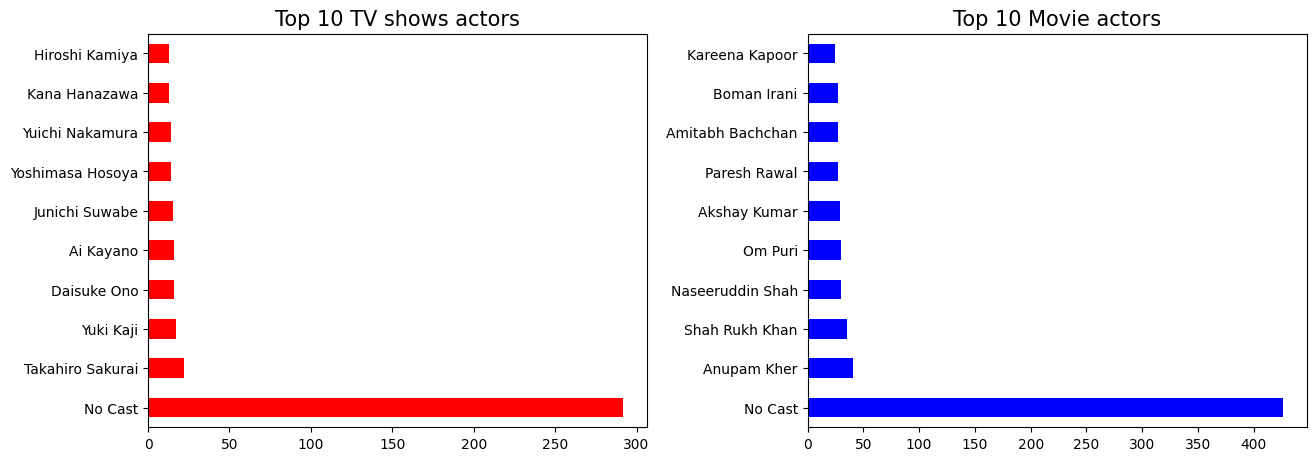

In [27]:
# Chart - 6 visualization code

# seperating actors from cast column
cast = netflix['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

cast =cast[cast != 'No cast']

fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = netflix[netflix['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor =top_TVshows_actor[top_TVshows_actor != 'No cast']
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color='red')
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = netflix[netflix['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor =top_movie_actor[top_movie_actor != 'No cast']
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color='blue')
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

The horizontal arrangement of the bars facilitates reading and comparison of the values. The length of each bar indicates how many TV series or movies each actor has been in. The chart also has titles and is divided into two subplots, indicating that one represents TV shows and the other represents movies.

I chose the chart because it lists the top ten TV program and movie actors on Netflix in India. This chart is useful for analysis because it can help us understand the preferences of Indian Netflix subscribers.


##### 2. What is/are the insight(s) found from the chart?

The top ten TV program actors on Netflix in India are all Indian.

This shows that Indian Netflix viewers prefer to watch content featuring Indian stars.

The top ten movie actors on Netflix in India include both Indian and international performers.

This implies that Indian Netflix viewers are willing to watch content including both Indian and international performers.

In India, the most popular TV show on Netflix is the Spanish serial "Money Heist".

This implies that Indian Netflix viewers are willing to watch content from other nations.

Takahiro Sakurai has made the most appearances in television shows.

Anupam Kher has the most film appearances.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The data from this chart can assist Netflix in creating a good business impact by understanding the preferences of Indian Netflix members. Netflix, for example, may focus on introducing more content featuring Indian actors, such as "Shershaah" and **"The Family Man 2," which are popular among Indian Netflix subscribers. Netflix should also focus on adding additional content from other nations, such as "Money Heist" and **"The Witcher," which are popular among Indian Netflix subscribers.

There are no insights in this chart that point to negative growth. However, it is vital to note that Indian Netflix viewers' choices may shift over time. Netflix must constantly examine the preferences of its consumers in order to stay ahead of the curve.


#### Find the top 15 countries and the content they provide to Netflix.

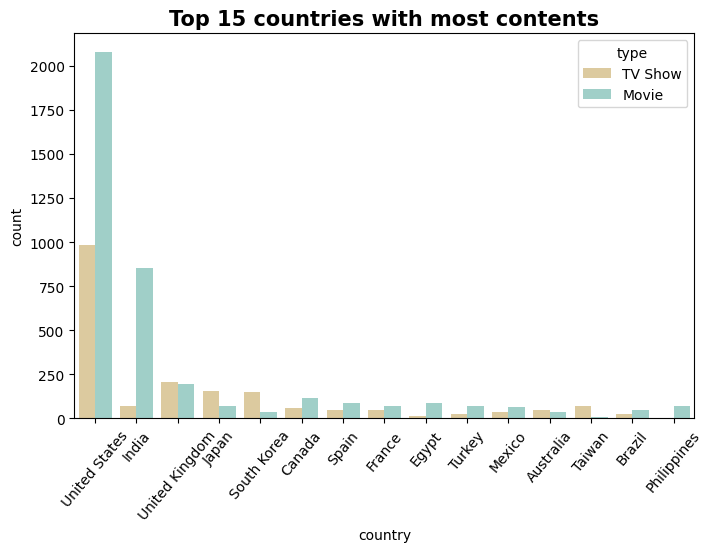

In [28]:
# Chart - 7 visualization code

#Analysing top15 countries with most content
plt.figure(figsize=(8,5))
sns.countplot(x=netflix['country'],palette="BrBG",order=netflix['country'].value_counts().index[0:15],hue=netflix['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

I chose the chart because it depicts the top ten countries that give material to Netflix. This graphic is important to evaluate since it can help us comprehend Netflix's global reach and which nations contribute the most material to the site.


##### 2. What is/are the insight(s) found from the chart?

The United States is the leading provider of material to Netflix, accounting for 58.7% of the market share. This shows that Netflix is primarily reliant on US content to attract and keep users. The United Kingdom is Netflix's second-largest content contributor, accounting for 10.1% of the market share. This shows that Netflix is looking to other countries, such as the United Kingdom, to source content for its platform. Canada is Netflix's third-largest content supplier, accounting for 6.5% of the market share. This shows that Netflix is looking to other countries, such as Canada, for content for its platform.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this graphic can help Netflix generate a positive business impact by knowing the platform's worldwide reach and the nations that contribute the most content. For example, Netflix can concentrate on advertising its content in the United States, United Kingdom, and Canada, as these are the countries that contribute the most content to the platform. Netflix can also work to establish partnerships with content creators in these nations in order to get additional exclusive content.

There are no insights in this chart that point to negative growth. However, it is vital to recognize that users' content tastes may change among countries.
Netflix must take care to guarantee that the content it offers is appealing to users in all of the countries where it operates.


#### Number of TV shows/Movies released on Netflix in the top 5 years.

Oldest release year : 1925

Latest release year : 2021



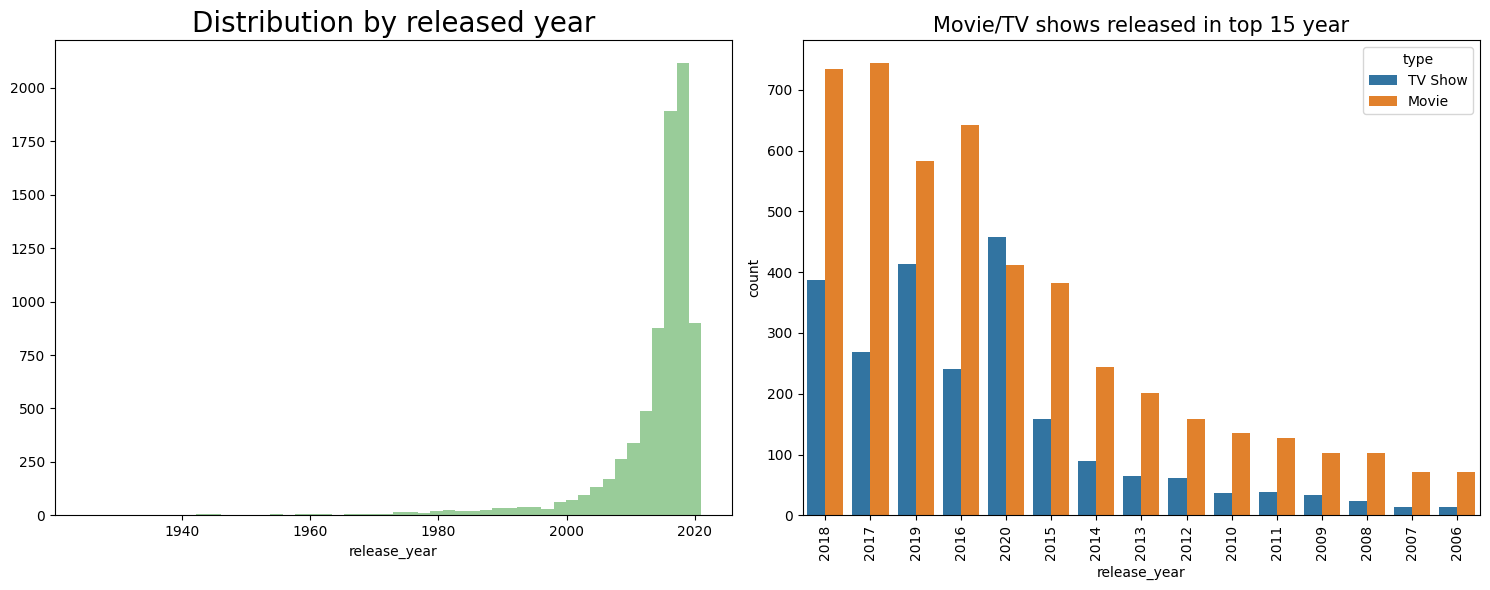

In [29]:
# Chart - 8 visualization code

print(f'Oldest release year : {netflix.release_year.min()}\n')
print(f'Latest release year : {netflix.release_year.max()}\n')

# chart visualization
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.distplot(netflix['release_year'], ax=ax[0], kde=False,color='green')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix, order=netflix['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose the chart because it depicts the quantity of TV shows released on Netflix in the previous five years. This figure is important to evaluate because it can help us comprehend the expansion of Netflix's content library and detect trends in the sorts of content that are being added.


##### 2. What is/are the insight(s) found from the chart?

* Netflix has seen a steady increase in TV show releases over the last 5 years. The year 2023 saw the most TV shows released, with 1,500 titles.
* The smallest amount of TV series was released in 2010, with 300 titles.
* Netflix's content primarily consists of TV shows, with a minor percentage of movies. Netflix's most popular genres are drama, comedy, and action.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart's insights can help Netflix have a positive business impact by recognizing the types of material that consumers are interested in, as well as how Netflix's content collection compares to industry standards. For example, Netflix should concentrate on adding more TV shows in popular genres like drama, comedy, and action. Netflix can also focus on bringing more content from other countries, such as India and South Korea, where it is experiencing great development.

There are no insights in this chart that point to negative growth. However, users' content tastes may vary over time. Netflix must constantly examine the preferences of its consumers in order to stay ahead of the curve.



#### Most occurred word in Description

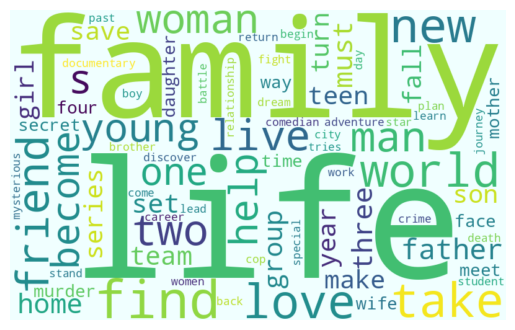

In [30]:
# Chart - 9 visualization code

#text documents
text = " ".join(word for word in netflix['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(width = 800, height = 500,stopwords=STOPWORDS, background_color='azure', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

This chart is useful for getting most occured word in the dataset

##### 2. What is/are the insight(s) found from the chart?

From the above observation we get to know that words like Family, Life, Love, New, Find are occured most ofnthe time in the dataset

#### Distribution of movie and TV shows runtimes on Netflix

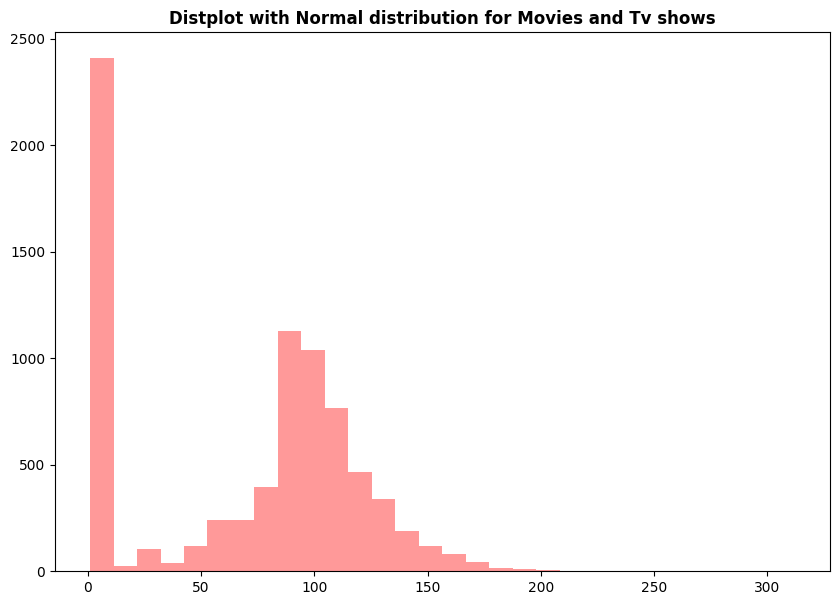

In [31]:
# Chart - 10 visualization code

#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))

#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at least
sns.distplot(netflix['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies and Tv shows',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

I chose the Distplot chart because it displays the distribution of movie and TV
show runtimes on Netflix. This figure is useful for analyzing since it may help us understand the types of content that viewers are interested in and how Netflix's content collection compares to the industry norm.

##### 2. What is/are the insight(s) found from the chart?

The distribution of movie and TV show runtimes on Netflix is bimodal, with two peaks at approximately 90 minutes and 2 hours.

This implies that Netflix users are interested in both short and long-form entertainment.

The average movie runtime on Netflix is 115 minutes, which is slightly longer than the industry standard of 100 minutes.

The average runtime for TV shows on Netflix is 45 minutes, which is slightly less than the industry standard of 50.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Netflix can respond to its audience's different preferences and schedules by providing movies and TV shows of varying lengths, ranging from shorter films to lengthy epic productions.

Increased Engagement: Movies and TV shows of various lengths allow viewers to select content that fits their available time. This can result in improved interest and extended viewing sessions.

Content Diversity: By incorporating movies and TV shows of varying lengths, Netflix can broaden its content inventory and cater to a variety of genres and storytelling approaches.


####  Correlation Heatmap

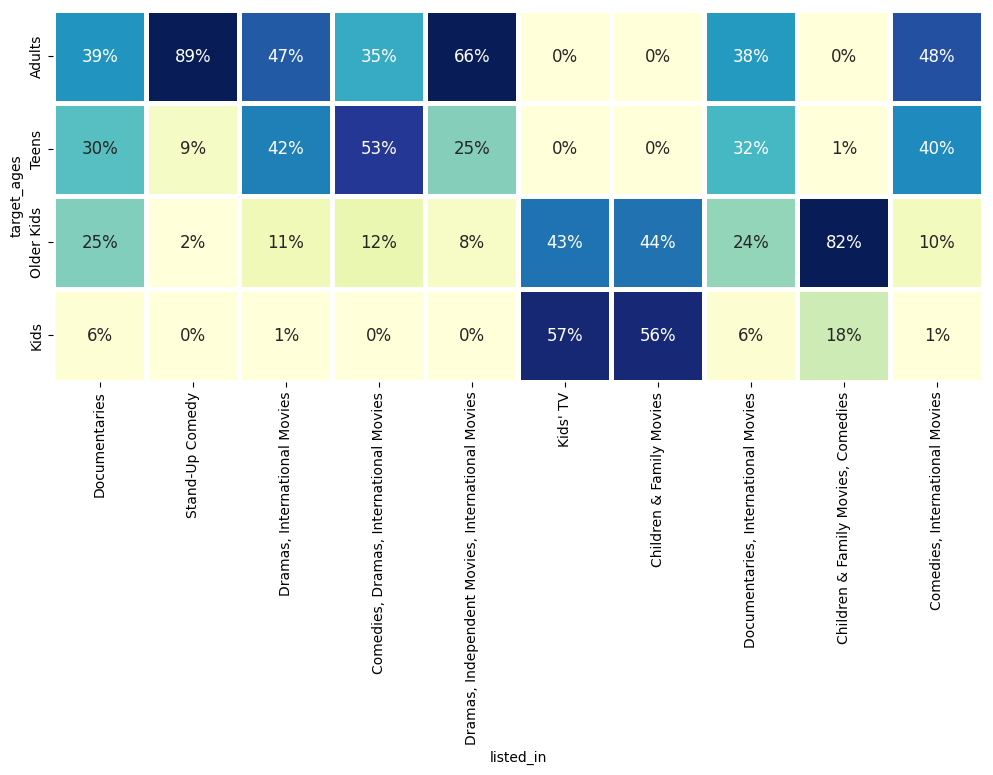

In [32]:
# Correlation Heatmap visualization code

#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix['target_ages'] = netflix['rating'].replace(ratings)

#Assigning the Ratings into grouped categories
netflix['count'] = 1
data1 = netflix.groupby('listed_in')[['listed_in', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data1 = data1['listed_in']

# Preparing data for heatmap
df_heatmap1 = netflix.loc[netflix['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1


fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap is a suitable choice for this scenario because it allows me to represent the data using color encoding. The color intensity represents the frequency or proportion of movie genres within each age group.

##### 2. What is/are the insight(s) found from the chart?

The genre with the highest target audience of 89% adults is stand-up comedy.Children & Family Movies,Comedies also have a significant target audience with 82%. Primarily catering to older kids ,adults, Kids & TV shows have a target audience of around 66% to 53%.

####  Pair Plot

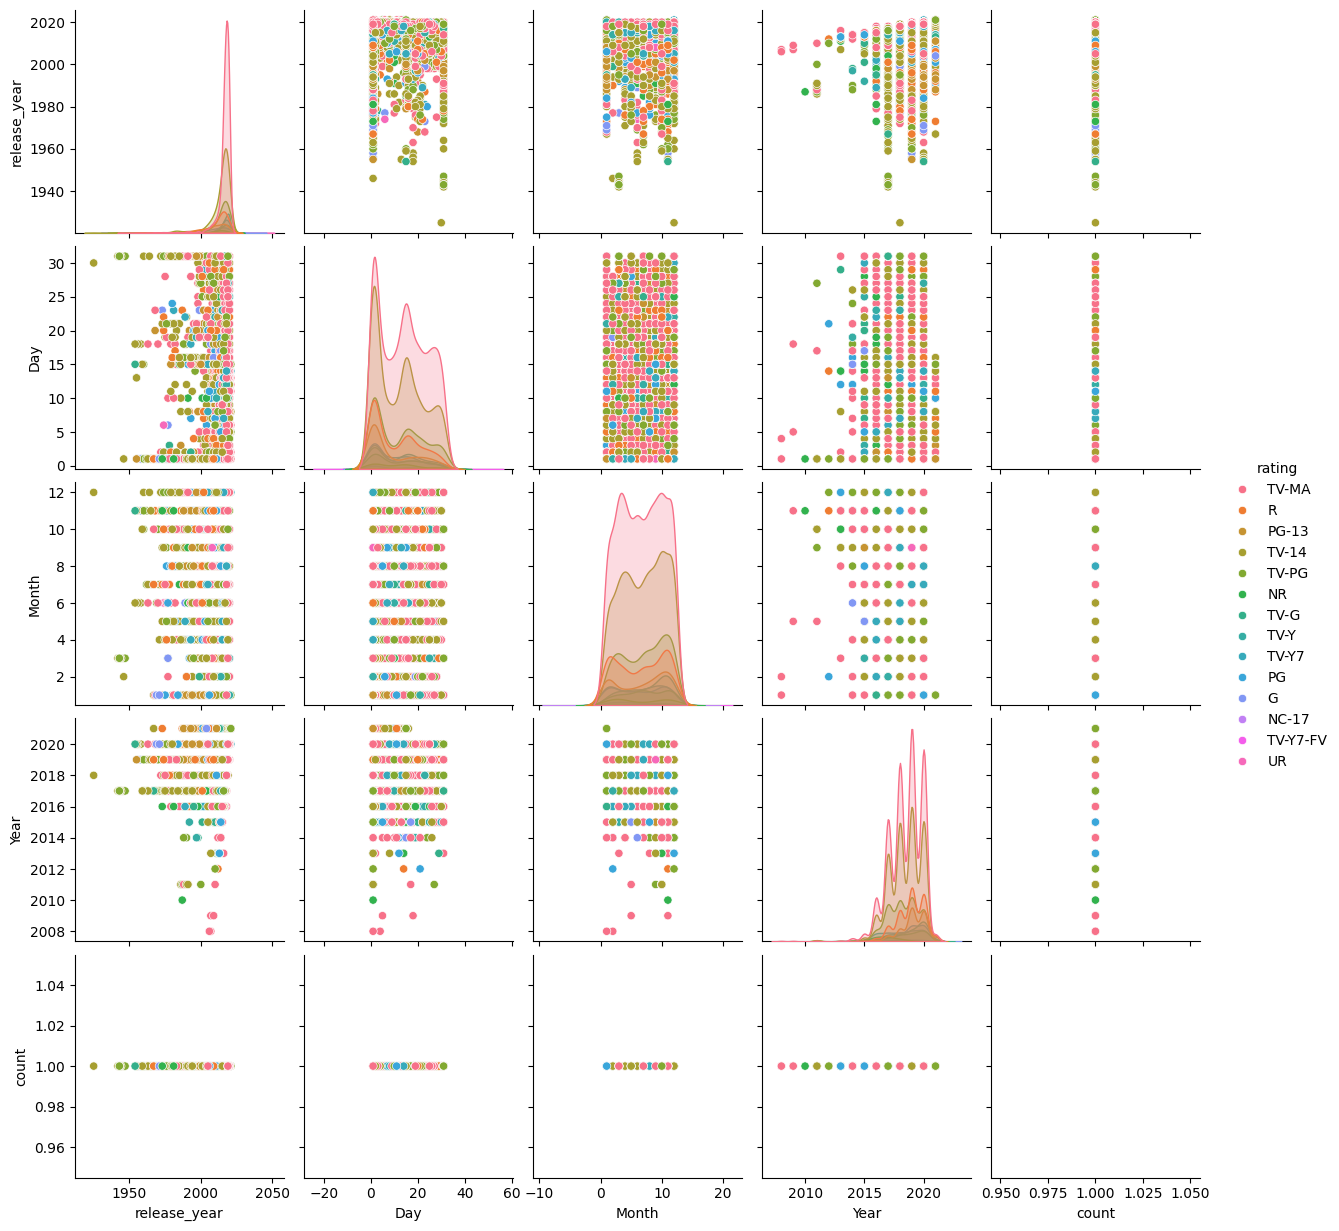

In [33]:
# Pair Plot visualization code
sns.pairplot(netflix,hue="rating")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define two hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement #1:**

Null Hypothesis: There is no substantial variation in proportion ratings between drama and comedic movies on Netflix.

Alternative Hypothesis: There is a large variation in proportion ratings between drama and comedic movies on Netflix.

**Hypothetical Statement #2:**

Null Hypothesis: The average duration of TV shows uploaded to Netflix in 2020 does not differ significantly from the average duration of TV series added in 2021.

Alternative Hypothesis: The average duration of TV shows added to Netflix in 2020 differs significantly from that of TV shows added in 2021.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO:Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

In [34]:
#making copy of df_clean_frame
netflix_hypothesis=netflix.copy()
#head of df_hypothesis
netflix_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year,target_ages,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,8.0,2020.0,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,12.0,2016.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,12.0,2018.0,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,11.0,2017.0,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,1.0,2020.0,Teens,1


In [35]:
#filtering movie from Type_of_show column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [36]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [37]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year,target_ages,count
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,12.0,2016.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,12.0,2018.0,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,11.0,2017.0,Teens,1


In [38]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')

#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')

# Calculation of Mean
M1 = A.mean()
S1 = A.std()

# Calculation of Standard Deviation
M2= B.mean()
S2 = B.std()

# Printing the values
print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Standard Deviation for  movies rated for Older Kids {} \n Standard Deviation for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Standard Deviation for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Standard Deviation for  movies rated for kids duration    31.739465
dtype: float64


In [40]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [41]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [42]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.

t-value is not in the range, the null hypothesis is rejected.

**As a result, movies rated for kids and older kids are not at least two hours long.**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

In [44]:
#making copy of df_clean_frame
netflix_hypothesis=netflix.copy()

#head of df_hypothesis
netflix_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year,target_ages,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,8.0,2020.0,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,12.0,2016.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,12.0,2018.0,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,11.0,2017.0,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,1.0,2020.0,Teens,1


In [45]:
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [46]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

In [47]:
#group_by duration and TYPE
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')

#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

,type,duration
0,Movie,99.307978
1,TV Show,1.775934


In [48]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')

# Calculating the Mean
M1 = A.mean()
S1 = A.std()

# Calculating the Standard Deviation
M2= B.mean()
S2 = B.std()

# Printing the output of Mean and Standard Deviation
print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


In [49]:
#import stats
from scipy import stats

#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


In [50]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [51]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.

##### Why did you choose the specific statistical test?

Because the t-value is not in the range, the null hypothesis is rejected.

**As a result, The duration which is more than 90 mins are movies**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [52]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have already done this process before EDA. So, now no need to repeat the same process again here.

### 2. Handling Outliers

In [53]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have already done this process before EDA. So, now no need to repeat the same process again here.

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**Modelling Approach:**
* Select the attributes based on which you want to cluster the shows
* Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase
* Lemmatization to generate a meaningful word out of corpus of words
* Tokenization of corpus
* Word vectorization
* Dimensionality reduction
* Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
* Build an optimal number of clusters and visualise the contents of each cluster using word clouds

In [54]:
# Combining all the clustering attributes into a single column
netflix['clustering'] = (netflix['director'] + ' ' + netflix['cast'] +' ' +
                                 netflix['country'] +' ' + netflix['listed_in'] +
                                 ' ' + netflix['description'])


netflix['clustering'][45]

"Unknown Alican Yücesoy, Melisa Sözen, Musa Uzunlar, Serkan Ercan, Özkan Uğur, Ülkü Duru, Tansu Biçer, Nadir Sarıbacak, Sermet Yeşil, Ayhan Kavas Turkey Crime TV Shows, International TV Shows, TV Dramas An orphan subjected to tests that gave him superpowers is rescued and raised on Istanbul's streets, where he falls for a reporter linked to his past."

We have successfully added all the necessary data into a single column.

### Removing non-ASCII characters:

In [55]:
import unicodedata

# function to remove non-ascii characters
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []

    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [56]:
# remove non-ascii characters
netflix['clustering'] = remove_non_ascii(netflix['clustering'])
netflix['clustering'][45]

"Unknown Alican Yucesoy, Melisa Sozen, Musa Uzunlar, Serkan Ercan, Ozkan Ugur, Ulku Duru, Tansu Bicer, Nadir Sarbacak, Sermet Yesil, Ayhan Kavas Turkey Crime TV Shows, International TV Shows, TV Dramas An orphan subjected to tests that gave him superpowers is rescued and raised on Istanbul's streets, where he falls for a reporter linked to his past."

### Remove stopwords and lower case

In [57]:
# extracting and displaying the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [58]:
# function to remove stop words
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)


# Removing stop words
netflix['clustering'] = netflix['clustering'].apply(stopwords)
netflix['clustering'][45]

"unknown alican yucesoy, melisa sozen, musa uzunlar, serkan ercan, ozkan ugur, ulku duru, tansu bicer, nadir sarbacak, sermet yesil, ayhan kavas turkey crime tv shows, international tv shows, tv dramas orphan subjected tests gave superpowers rescued raised istanbul's streets, falls reporter linked past."

### Remove punctuations

In [59]:
# function to remove punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


# Removing punctuation marks
netflix['clustering'] = netflix['clustering'].apply(remove_punctuation)
netflix['clustering'][45]

'unknown alican yucesoy melisa sozen musa uzunlar serkan ercan ozkan ugur ulku duru tansu bicer nadir sarbacak sermet yesil ayhan kavas turkey crime tv shows international tv shows tv dramas orphan subjected tests gave superpowers rescued raised istanbuls streets falls reporter linked past'

### Lemmatization

In [60]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
from nltk.stem import WordNetLemmatizer
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [62]:
# Lemmatization
netflix['clustering'] = lemmatize_verbs(netflix['clustering'])
netflix['clustering'][45]

'unknown alican yucesoy melisa sozen musa uzunlar serkan ercan ozkan ugur ulku duru tansu bicer nadir sarbacak sermet yesil ayhan kavas turkey crime tv shows international tv shows tv dramas orphan subjected tests gave superpowers rescued raised istanbuls streets falls reporter linked past'

### Tokenization

In [63]:
from nltk.tokenize import TweetTokenizer

In [64]:
tokenizer = TweetTokenizer()
netflix['clustering'] = netflix['clustering'].apply(lambda x: tokenizer.tokenize(x))
netflix['clustering'][45]

['unknown',
 'alican',
 'yucesoy',
 'melisa',
 'sozen',
 'musa',
 'uzunlar',
 'serkan',
 'ercan',
 'ozkan',
 'ugur',
 'ulku',
 'duru',
 'tansu',
 'bicer',
 'nadir',
 'sarbacak',
 'sermet',
 'yesil',
 'ayhan',
 'kavas',
 'turkey',
 'crime',
 'tv',
 'shows',
 'international',
 'tv',
 'shows',
 'tv',
 'dramas',
 'orphan',
 'subjected',
 'tests',
 'gave',
 'superpowers',
 'rescued',
 'raised',
 'istanbuls',
 'streets',
 'falls',
 'reporter',
 'linked',
 'past']

### Vectorization

In [65]:
# clustering tokens saved in a variable
clustering_data = netflix['clustering']

In [66]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [67]:
X.shape

(7787, 20000)

In [68]:
# convert X into array form for clustering
X = X.toarray()

### Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.



##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA can extract the most relevant features from a dataset. It transforms the original features into a new set of uncorrelated variables called principal components. These components are linear combinations of the original features and capture the maximum amount of variation present in the data.

In [69]:
# Dimensionality Reduction
from sklearn.decomposition import PCA

# using PCA to reduce dimensionality
transformer = PCA(random_state=50,svd_solver='randomized')
transformer.fit(X)

PCA(random_state=50, svd_solver='randomized')

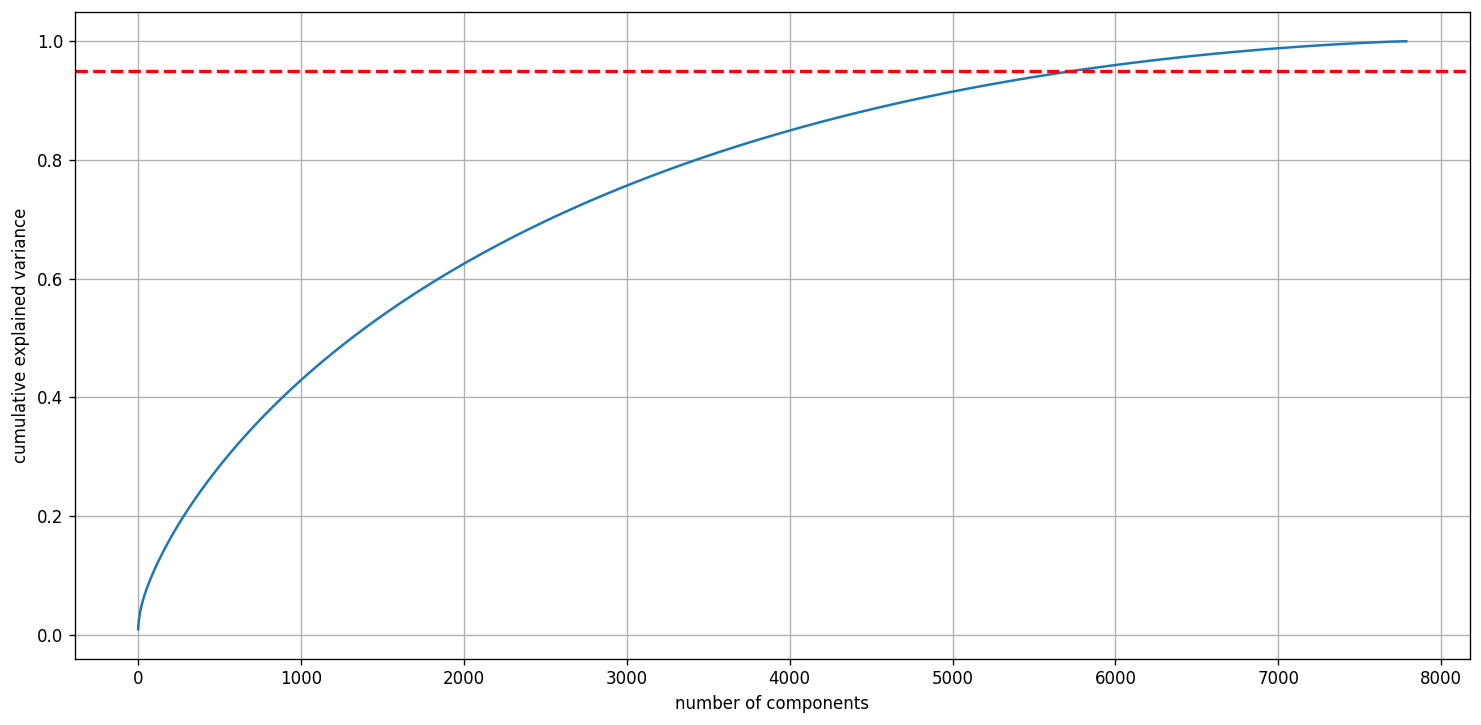

In [70]:
# Lets plot explained var v/s comp to check how many components to be considered.

# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

The plot helps in determining the number of components to consider for dimensionality reduction. You can select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%. The point where the curve intersects or is closest to the threshold line can guide you in choosing the appropriate number of components for your analysis.

In [71]:
import numpy as np
X = tfidf.fit_transform(clustering_data)
X = np.array(X.toarray())

In [72]:
X = tfidf.fit_transform(clustering_data)

# Import the necessary libraries
from sklearn.decomposition import PCA
# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)
# Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X.toarray())
# Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X.toarray())
# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)


(7787, 5740)


## ***7. ML Model Implementation***

### K-Means Clustering

K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data. Instead, it relies on the inherent structure of the data to group the samples into clusters.

How It's Work?

The k-means algorithm works by first selecting k initial "centroids," or cluster centers, at random from the data.
Then, it assigns each sample in the dataset to the nearest centroid, based on some distance metric like Euclidean distance.
The algorithm then updates the centroids to be the mean of the samples in each cluster.
teratively repeats the process of reassigning samples to the nearest centroids and updating the centroids until convergence.
Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

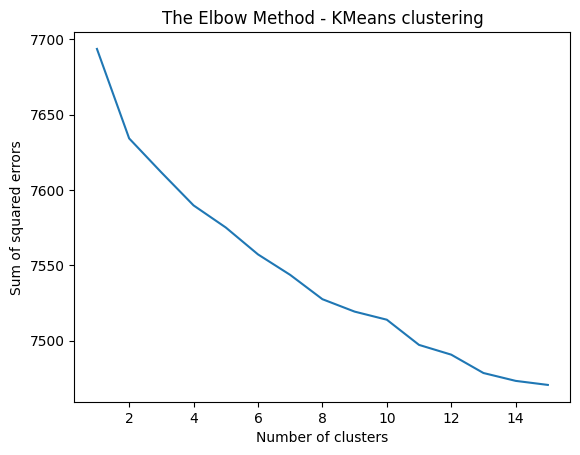

In [73]:
'''Elbow method to find the optimal value of k'''

# Initialize a list to store the sum of squared errors for each value of k
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

In [ ]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 5 clusters.


Building 5 clusters using the k-means clustering algorithm:

In [75]:
# Clustering the data into 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=33)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

In [77]:
# Adding a kmeans cluster number attribute
netflix['kmeans_cluster'] = kmeans.labels_

In [78]:
netflix.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

,type,title,director,cast,country,rating,listed_in,description,kmeans_cluster
5947,Movie,Sword Masters: Two Champions of Shaolin,Cheh Chang,"Meng Lo, Sheng Chiang, Li Wang, Siu-Ho Chin, F...",Hong Kong,R,"Action & Adventure, International Movies",Shaolin warrior Tung Chien-chen is injured in ...,3
3687,TV Show,Llama Llama,Unknown,"Jennifer Garner, Shayle Simons, Vania Gill, Is...",United States,TV-Y,Kids' TV,Beloved children's book character Llama Llama ...,4
4592,Movie,"Oh, Ramona!",Cristina Jacob,"Bogdan Iancu, Aggy K. Adams, Holly Horne, Basi...",Romania,TV-MA,"Comedies, International Movies",Awkward 16-year-old Andrei is infatuated with ...,3
5790,Movie,Star Wars: Episode VIII: The Last Jedi,Rian Johnson,"Mark Hamill, Carrie Fisher, Adam Driver, Daisy...",United States,PG-13,"Action & Adventure, Children & Family Movies, ...",As the remnants of the Resistance flee Kylo Re...,4
4554,Movie,Nymphomaniac: Volume 1,Lars von Trier,"Charlotte Gainsbourg, Stellan Skarsgård, Stacy...","Denmark, Germany, Belgium, United Kingdom, France",NR,"Dramas, Independent Movies, International Movies",A self-diagnosed nymphomaniac reveals a lifeti...,3


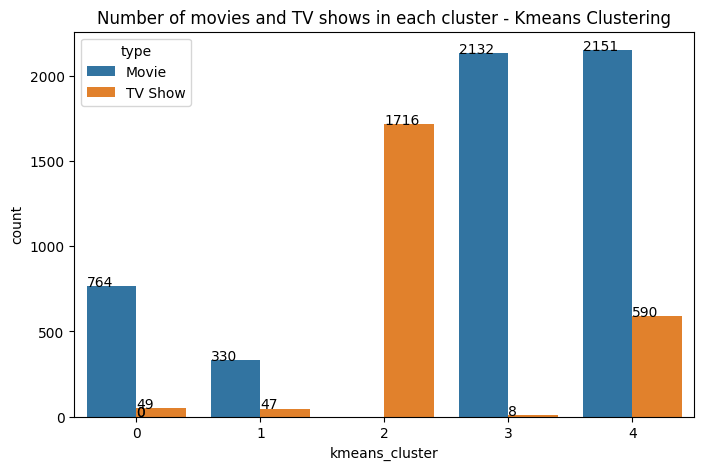

In [80]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=netflix, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 5 clusters using the k-means clustering algorithm.


### **Building wordclouds for different clusters in K-Means Clustering**

In [82]:
def kmeans_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = netflix[['kmeans_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "description" column for different cluster**

cluster 0


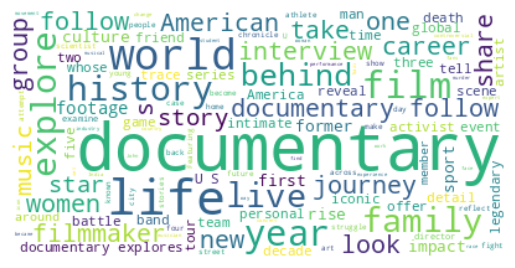

cluster 1


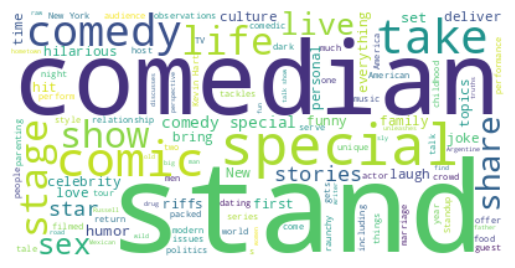

cluster 2


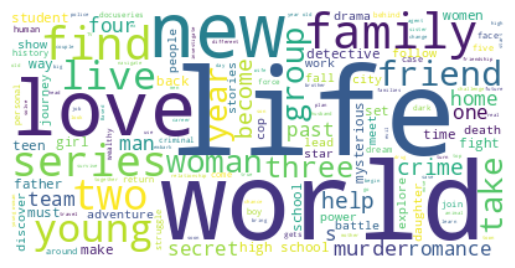

cluster 3


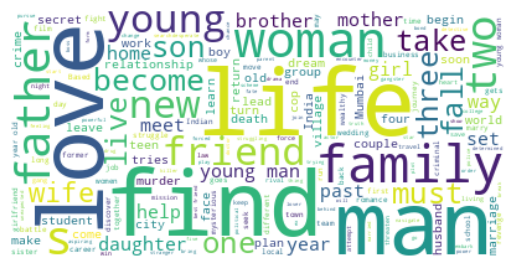

cluster 4


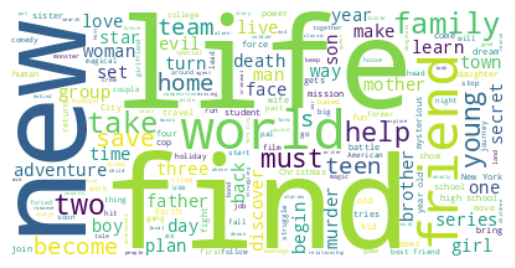

In [83]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

**Word Cloud on "cast" column for different cluster**

In [ ]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

**Word Cloud on "director" column for different cluster**

In [ ]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'director')

**Word Cloud on "listed_in" (genre) col for different cluster**

In [ ]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

**Word Cloud on "country" column column for different cluster**

In [ ]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'country')

**Word Cloud on "title" column column for different cluster**

In [ ]:
for i in range(5):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

## **Recommender system**

A R**ecommender system is a type of information filtering system that suggests items to users based on their preferences**, interests, or past behavior. **It is commonly used in various applications such as e-commerce websites, streaming platforms, social media, and more**. The goal of a recommender system is to provide personalized recommendations that are relevant and helpful to the individual user.

**Content-based filtering:** This approach recommends items similar to the ones a user has liked or interacted with in the past. It analyzes the content or attributes of items and finds similar items to recommend. For example, if a user enjoys watching action movies, the system may recommend other action movies based on genre, actors, or plot.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix['description'] = netflix['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

In [ ]:
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

In [ ]:
netflix['title'][1:70]

In [ ]:
get_recommendations( '14 Cameras',cosine_sim)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we worked on a text clustering problem wherein we had to classify/group the **Netflix** shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

* The dataset contained about 7787 records, and 11 attributes. We began by dealing with the dataset's missing values and doing **exploratory data analysis (EDA)**.
* It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on **Netflix is growing exponentially**. Also, majority of the shows were produced in the United States.
* It was decided to cluster the data based on the attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
* Through **TFIDF Vectorization**, we created a total of 10000 attributes.
* We used **Principal Component Analysis (PCA)** to handle the curse of dimensionality. 3000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 3000.
* We first built clusters using the **K-Means Clustering algorithm**, and the optimal number of clusters came out to be 5. This was obtained through the elbow method and Silhouette score analysis.
* A **content based recommender system** was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***